# Explore here

In [69]:
# Your code here

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [70]:
# Guarda archivo carpeta data - raw
df.to_csv('../data/raw/df_medical_insurance_cost.csv', index=False)

In [71]:
df.shape


(1338, 7)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [73]:
df = df.drop_duplicates().reset_index(drop=True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


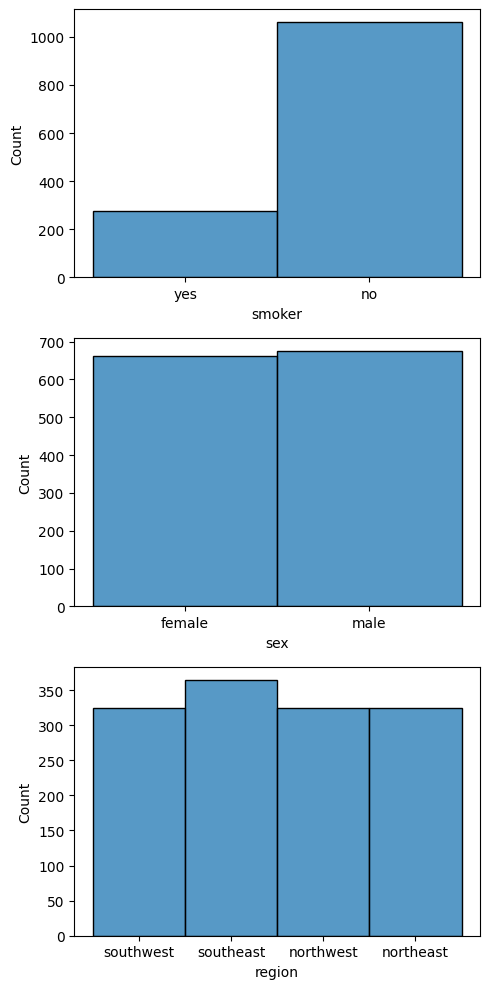

In [74]:
# EDA

import matplotlib.pyplot as plt 
import seaborn as sns

fig, axis = plt.subplots(3, 1, figsize = (5, 10))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = df, x = "smoker")
sns.histplot(ax = axis[1], data = df, x = "sex")
sns.histplot(ax = axis[2], data = df, x = "region")


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

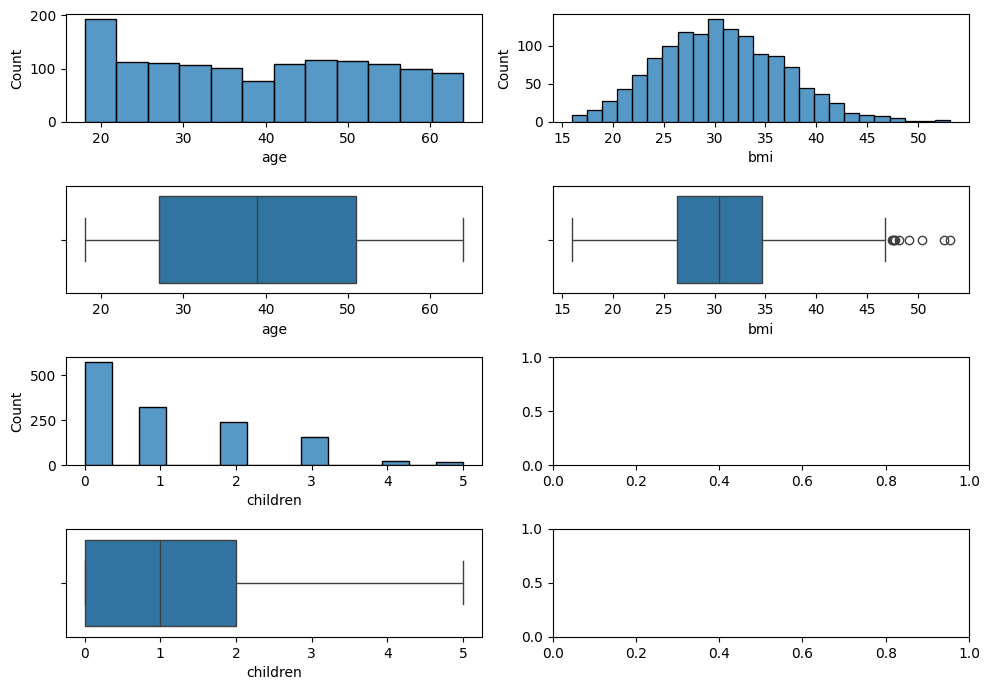

In [75]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "age")
sns.boxplot(ax = axis[1, 0], data = df, x = "age")
sns.histplot(ax = axis[0, 1], data = df, x = "bmi")
sns.boxplot(ax = axis[1, 1], data = df, x = "bmi")
sns.histplot(ax = axis[2, 0], data = df, x = "children")
sns.boxplot(ax = axis[3, 0], data = df, x = "children")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

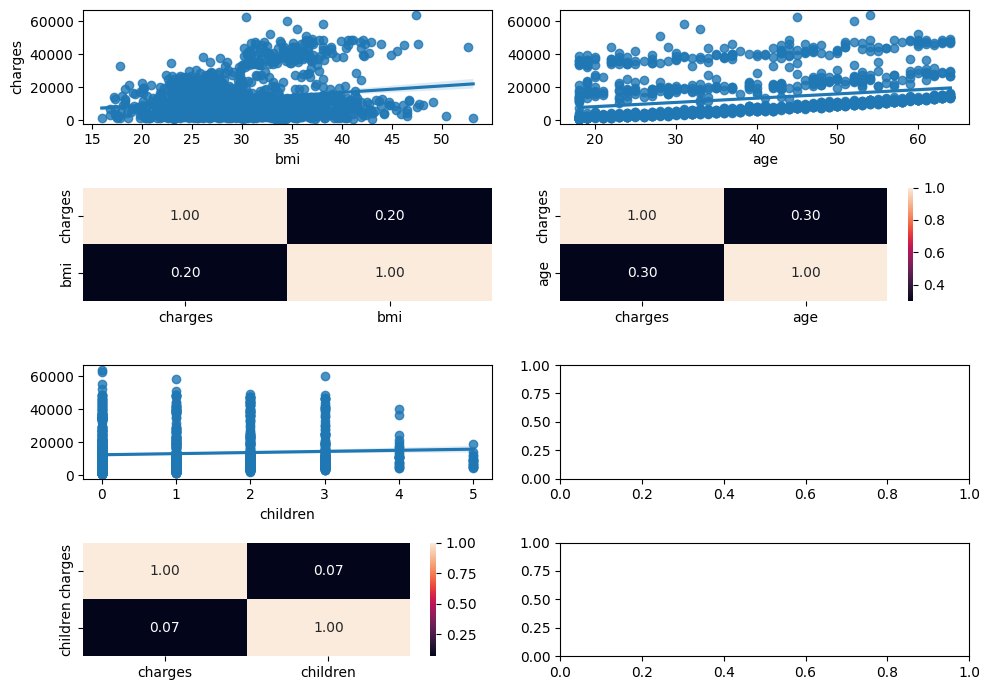

In [76]:
fig, axis = plt.subplots(4, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = df, x = "bmi", y = "charges")
sns.heatmap(df[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = df, x = "age", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = df, x = "children", y = "charges").set(ylabel=None)
sns.heatmap(df[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

<Axes: >

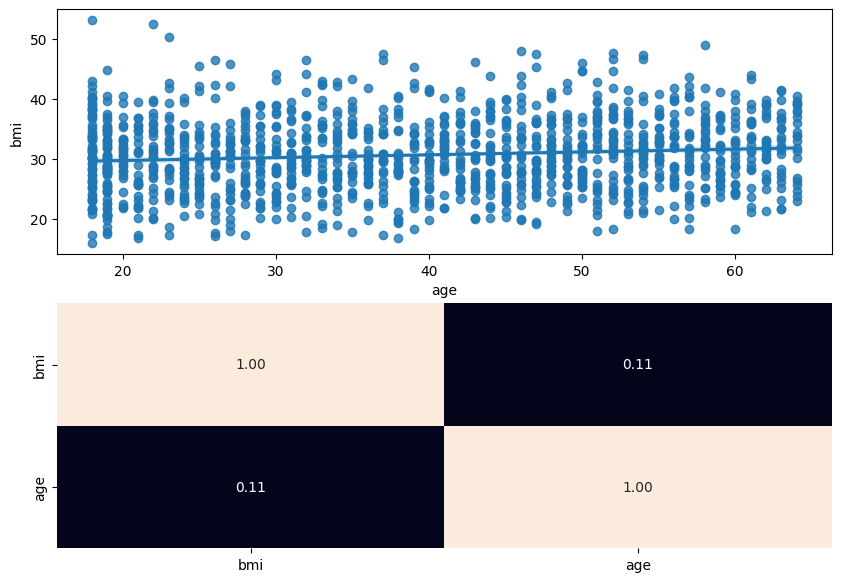

In [77]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0], data = df, x = "age", y = "bmi")
sns.heatmap(df[["bmi", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

In [78]:
min = df['charges'].min()
max = df['charges'].max()
print(min)
print(max)

1121.8739
63770.42801


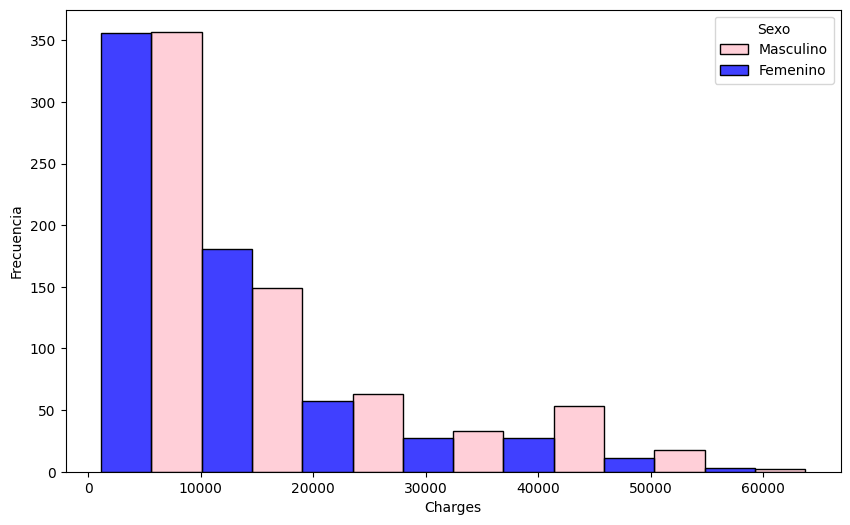

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el histograma con Seaborn
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='charges', bins=7, hue='sex', multiple='dodge', palette=['blue', 'pink'])

plt.xlabel('Charges')
plt.ylabel('Frecuencia')
plt.legend(title='Sexo', labels=['Masculino', 'Femenino'])

plt.show()



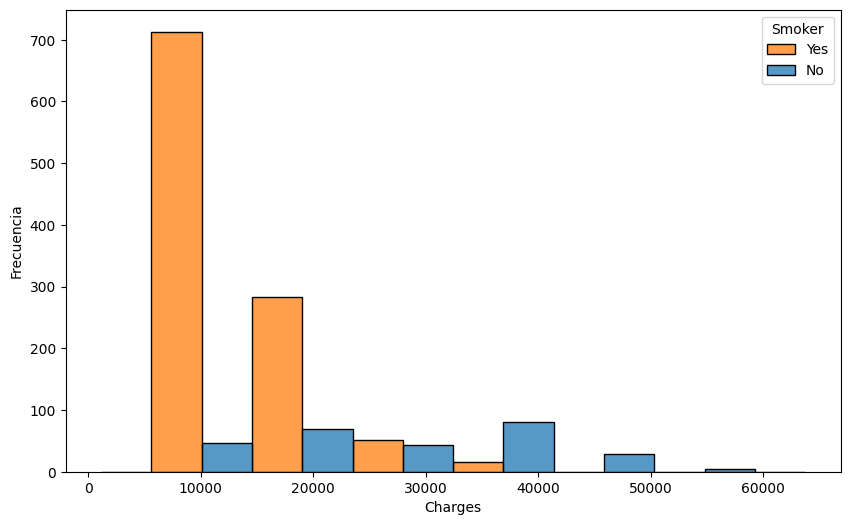

In [80]:
plt.figure(figsize=(10, 6))

sns.histplot(data=df, x='charges', bins=7, hue='smoker', multiple='dodge')

plt.xlabel('Charges')
plt.ylabel('Frecuencia')
plt.legend(title='Smoker', labels=['Yes', 'No'])

plt.show()

In [81]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame
df['sex_n'] = pd.factorize(df['sex'])[0]
df['smoker_n'] = pd.factorize(df['smoker'])[0]
df['region_n'] = pd.factorize(df['region'])[0]

num_variables = ['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges']

scaler = MinMaxScaler()
columnas_escaladas = scaler.fit_transform(df[num_variables])
df_escalado = pd.DataFrame(columnas_escaladas, index=df.index, columns=num_variables)
df_escalado


,age,bmi,children,sex_n,smoker_n,region_n,charges
0,0.021739,0.321227,0.0,0.0,0.0,0.000000,0.251611
1,0.000000,0.479150,0.2,1.0,1.0,0.333333,0.009636
2,0.217391,0.458434,0.6,1.0,1.0,0.333333,0.053115
3,0.326087,0.181464,0.0,1.0,1.0,0.666667,0.333010
4,0.304348,0.347592,0.0,1.0,1.0,0.666667,0.043816
...,...,...,...,...,...,...,...
1332,0.695652,0.403820,0.6,1.0,1.0,0.666667,0.151299
1333,0.000000,0.429379,0.0,0.0,1.0,1.000000,0.017305
1334,0.000000,0.562012,0.0,0.0,1.0,0.333333,0.008108
1335,0.065217,0.264730,0.0,0.0,1.0,0.000000,0.014144


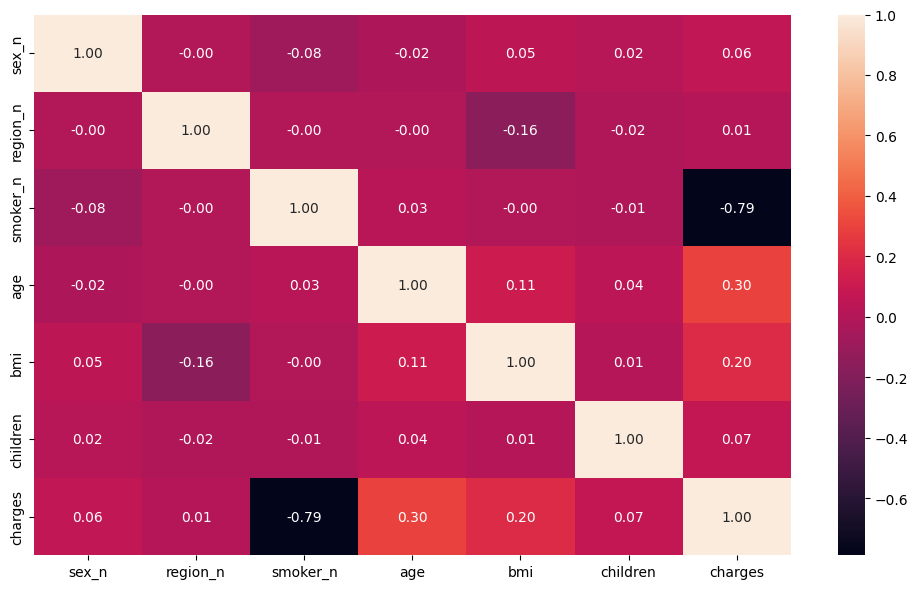

In [82]:
fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(df[["sex_n", "region_n", "smoker_n", "age", "bmi", "children","charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

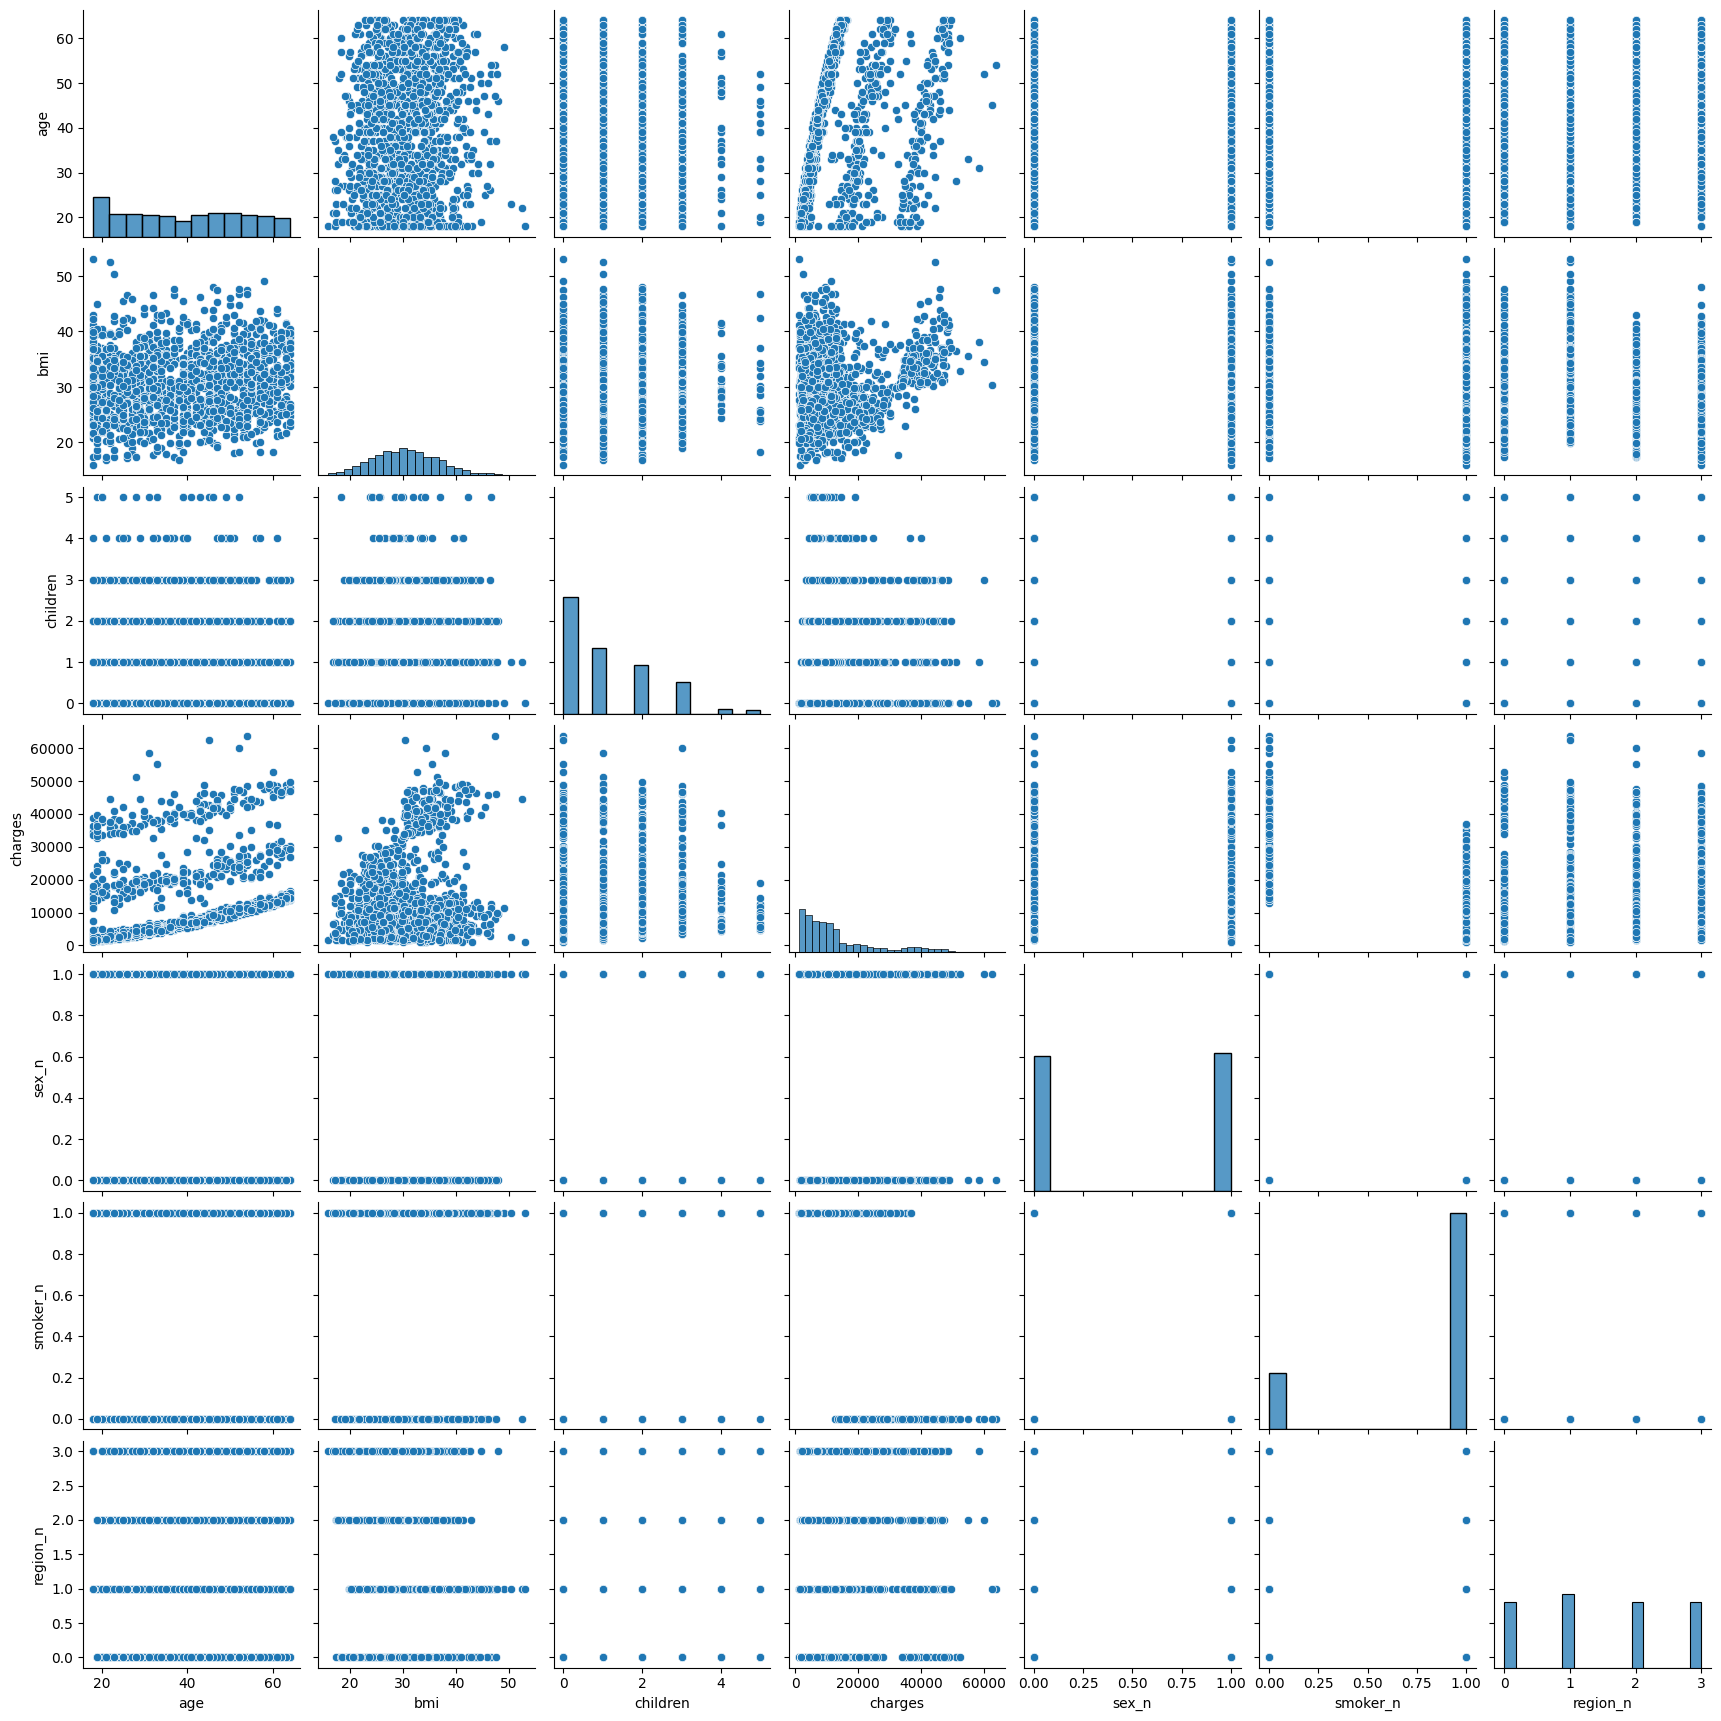

In [83]:
sns.pairplot(data=df)

In [84]:
from sklearn.model_selection import train_test_split

X = df_escalado.drop(['charges'], axis=1)  
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

In [86]:
print(f'Intercepto: {model.intercept_}')
print(f'coeficientes: {model.coef_}')
df_escalado.columns

Intercepto: 20758.584389905787
coeficientes: [ 11443.14728148  11619.67819122   2670.60438271    -99.69539417
 -23052.15275173    712.87544245]


Index(['age', 'bmi', 'children', 'sex_n', 'smoker_n', 'region_n', 'charges'], dtype='object')

In [87]:
y_pred = model.predict(X_test)
y_pred

array([ 8.08045019e+03,  5.59287112e+03,  1.43782987e+04,  3.17318195e+04,
        9.15835694e+03,  1.33610143e+04,  3.02576553e+04,  1.30864736e+03,
        1.08494254e+04,  1.13755485e+04,  1.04822214e+04,  3.31558608e+04,
        3.09123841e+04,  1.71688443e+04,  1.06361393e+04,  9.37424715e+03,
        3.96524338e+03,  3.19229863e+04,  3.08468457e+03,  5.47544373e+03,
        3.76844305e+03,  3.01552667e+04,  1.50768984e+04,  3.02746510e+04,
        3.10830548e+04,  5.52001772e+03,  3.56655758e+04,  3.63713163e+04,
        1.12979802e+04,  1.40664742e+04,  6.37519963e+03,  1.29381095e+04,
        6.79284837e+02,  1.19476924e+04,  3.97832706e+04,  1.21517558e+04,
        4.57717842e+03,  4.01652351e+03,  3.11475453e+04,  9.22301501e+03,
        6.86852604e+03,  3.00358113e+04,  3.49732855e+04,  1.21709787e+04,
        7.46262777e+03,  3.27014535e+03,  6.02195905e+03,  8.81742438e+03,
        4.32171874e+03,  9.25718479e+03,  6.82679737e+03,  1.18887556e+04,
        3.11350727e+04,  

In [88]:
def R2_ajustado(r2,X_train):
    n=len(X_train)
    p= len(X_train.columns)
    return 1-((1-r2)*(n-1)/(n-p-1))

In [89]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

Error cuadrático medio: 35493102.61165052
Coeficiente de determinación: 0.8068466322629111
R2_ajustado 0.8057553702982948


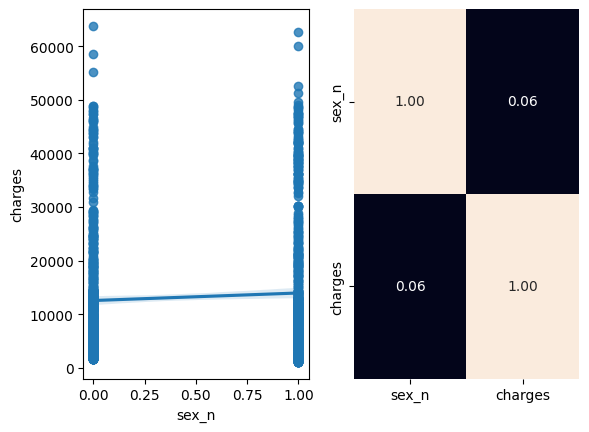

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 2)
sns.regplot(ax=axis[0], data=df, x='sex_n', y='charges')
sns.heatmap(ax=axis[1], data=df[['sex_n', 'charges']].corr(), annot=True, fmt='.2f', cbar=False)

plt.show()




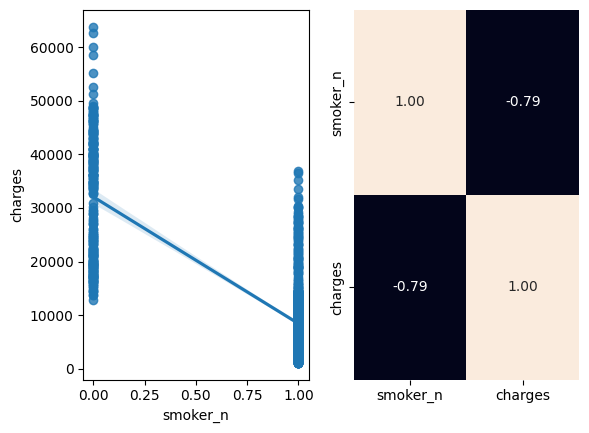

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 2)
sns.regplot(ax=axis[0], data=df, x='smoker_n', y='charges')
sns.heatmap(ax=axis[1], data=df[['smoker_n', 'charges']].corr(), annot=True, fmt='.2f', cbar=False)

plt.show()

In [92]:
y_pred = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_test,y_pred)}')
print(f'R2 : {r2_score(y_test,y_pred)}')
print(f'R2_ajustado {R2_ajustado(r2_score(y_test,y_pred),X_train)}')

MSE: 35493102.61165052
R2 : 0.8068466322629111
R2_ajustado 0.8057553702982948
